### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.applications.vgg19 import VGG19
from keras.models import Model
import cv2 
import os

### Defining Data Paths

In [2]:
train_path = "C:/Users/Computing/Desktop/data-task1/train"
test_path = "C:/Users/Computing/Desktop/data-task1/test"
val_path = "C:/Users/Computing/Desktop/data-task1/val"

no_pneumonia


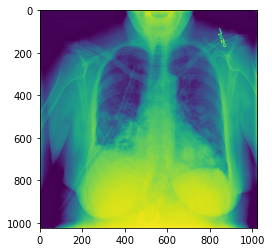

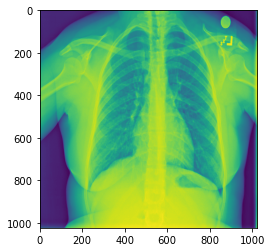

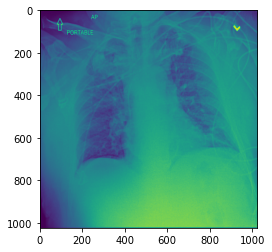

pneumonia


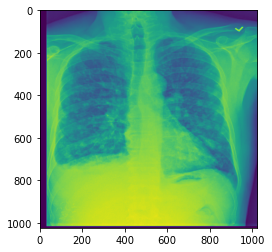

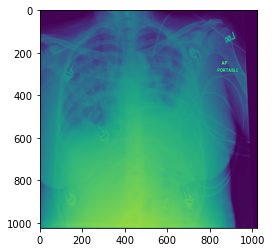

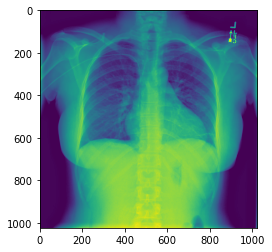

In [3]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    print(folder)
    for i in range(3):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        implot = plt.imshow(img)
        plt.show()
        #img = cv2.imread(temp_path, cv2.IMREAD_GRAYSCALE)
        #plt.imshow(img, cmap = 'gray')

### Converting Image to Pixels

In [4]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path = path + "/" + folder
        
        for img in os.listdir(sub_path):
            image_path = sub_path + "/" + img
            img_arr = cv2.imread(image_path)
            img_arr = cv2.resize(img_arr, size)
            data.append(img_arr)
    return data

In [5]:
size = (250,250)

In [6]:
train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

### Normalization

In [7]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [8]:
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255
x_train

array([[[[0.35294118, 0.35294118, 0.35294118],
         [0.18823529, 0.18823529, 0.18823529],
         [0.10980392, 0.10980392, 0.10980392],
         ...,
         [0.30980392, 0.30980392, 0.30980392],
         [0.49803922, 0.49803922, 0.49803922],
         [0.6745098 , 0.6745098 , 0.6745098 ]],

        [[0.1254902 , 0.1254902 , 0.1254902 ],
         [0.05098039, 0.05098039, 0.05098039],
         [0.01960784, 0.01960784, 0.01960784],
         ...,
         [0.07843137, 0.07843137, 0.07843137],
         [0.22352941, 0.22352941, 0.22352941],
         [0.49803922, 0.49803922, 0.49803922]],

        [[0.02745098, 0.02745098, 0.02745098],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.05490196, 0.05490196, 0.05490196],
         [0.23529412, 0.23529412, 0.23529412]],

        ...,

        [[0.02352941, 0.02352941, 0.02352941],
         [0.01176471, 0.01176471, 0.01176471]

In [9]:
x_train.shape
x_test.shape

(500, 250, 250, 3)

### Defining Target Variables

In [10]:
def data_class(data_path):
    datagen = ImageDataGenerator(rescale = 1./255)
    
    classes = datagen.flow_from_directory(data_path,
                                           target_size = (250, 250),
                                           batch_size = 32,
                                           class_mode = 'categorical')
    return classes

In [11]:
train_class = data_class(train_path)
test_class = data_class(test_path)
val_class = data_class(val_path)

Found 3000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [13]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
train_class.class_indices

{'no_pneumonia': 0, 'pneumonia': 1}

In [15]:
print("y_train_shape", y_train.shape,
     "y_test_shape", y_test.shape,
     "y_val_shape", y_val.shape,)

y_train_shape (3000,) y_test_shape (500,) y_val_shape (500,)


### VGG19 MODEL

In [16]:
vgg = VGG19(input_shape = (250,250,3), weights = "imagenet", include_top = False)
for layer in vgg.layers:
    layer.trainable = False
X = Flatten()(vgg.output) 
prediction = Dense(3, activation='softmax')(X) 
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 

In [18]:
history = model.fit(x_train,y_train,validation_data = (x_val, y_val),epochs = 10 )

Epoch 1/10
94/94 [==============================] - 278s 3s/step - loss: 0.5943 - accuracy: 0.7583 - val_loss: 0.4286 - val_accuracy: 0.7980
Epoch 2/10
94/94 [==============================] - 315s 3s/step - loss: 0.3974 - accuracy: 0.8270 - val_loss: 0.4635 - val_accuracy: 0.7980
Epoch 3/10
94/94 [==============================] - 278s 3s/step - loss: 0.3569 - accuracy: 0.8390 - val_loss: 0.6200 - val_accuracy: 0.7840
Epoch 4/10
94/94 [==============================] - 278s 3s/step - loss: 0.3355 - accuracy: 0.8497 - val_loss: 0.4331 - val_accuracy: 0.7820
Epoch 5/10
94/94 [==============================] - 277s 3s/step - loss: 0.3419 - accuracy: 0.8513 - val_loss: 0.4308 - val_accuracy: 0.8160
Epoch 6/10
94/94 [==============================] - 277s 3s/step - loss: 0.2794 - accuracy: 0.8817 - val_loss: 0.4662 - val_accuracy: 0.7840
Epoch 7/10
94/94 [==============================] - 276s 3s/step - loss: 0.2825 - accuracy: 0.8820 - val_loss: 0.4726 - val_accuracy: 0.8000
Epoch 8/10
94

### VISUALIZATION

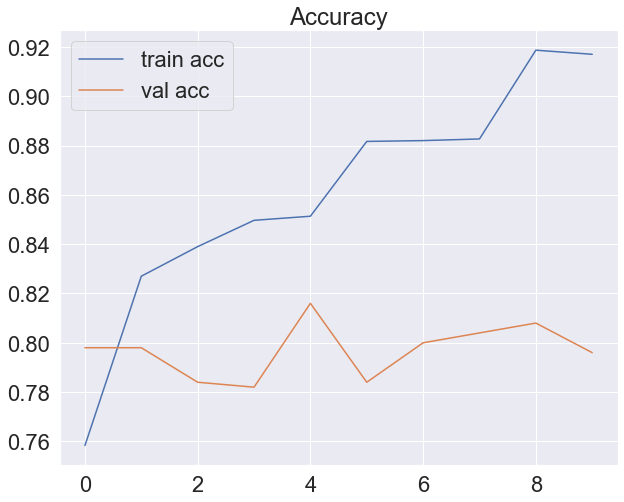

In [26]:
plt.figure(figsize=(10,8)) 
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

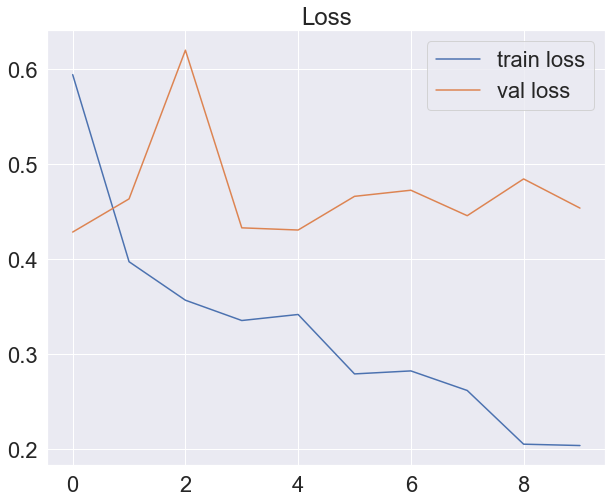

In [27]:
plt.figure(figsize=(10,8)) 
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

### Model Evaluation

In [21]:
model.evaluate(x_test, y_test)

16/16 [==============================] - 37s 2s/step - loss: 0.4576 - accuracy: 0.7980


[0.457600861787796, 0.7979999780654907]

In [43]:
y_pred = model.predict(x_test)

16/16 [==============================] - 37s 2s/step


In [44]:
y_pred = np.argmax(y_pred,axis = 1)


### Classification Report

In [52]:
print(classification_report(y_test, y_pred, target_names = ['No Pneumonia (Class 0)', 'Pneumonia (Class 1)']))

                        precision    recall  f1-score   support

No Pneumonia (Class 0)       0.83      0.94      0.88       395
   Pneumonia (Class 1)       0.54      0.25      0.34       105

              accuracy                           0.80       500
             macro avg       0.68      0.60      0.61       500
          weighted avg       0.77      0.80      0.77       500



### Confusion Matrix

In [53]:
cm = confusion_matrix(y_test, y_pred)
cm

print('True Positive  (TP) = ', cm[0][0])
print('False Positive (FP) = ', cm[0][1])
print('False Negative (FN) = ', cm[1][0])
print('True Negative  (TN) = ', cm[1][1])

True Positive  (TP) =  373
False Positive (FP) =  22
False Negative (FN) =  79
True Negative  (TN) =  26


### Precision Score, Recall Score, F1 score

In [54]:
if (cm[0][0] + cm[0][1])!=0 and (cm[0][0], cm[1][0])!=0:
      precision= round((cm[0][0] / (cm[0][0] + cm[0][1]))*100, 2) 
      recall   = round((cm[0][0] / (cm[0][0] + cm[1][0]))*100, 2) 
      f1_score = round(2*((precision*recall)/(precision+recall)), 2)       
      print(f'Precision Score: {precision}%')
      print(f'Recall Score: {recall}%')
      print(f'F1 Score: {f1_score}%')
      print('='*50) 
      print('\n')

Precision Score: 94.43%
Recall Score: 82.52%
F1 Score: 88.07%




### Plot Confusion Matrix

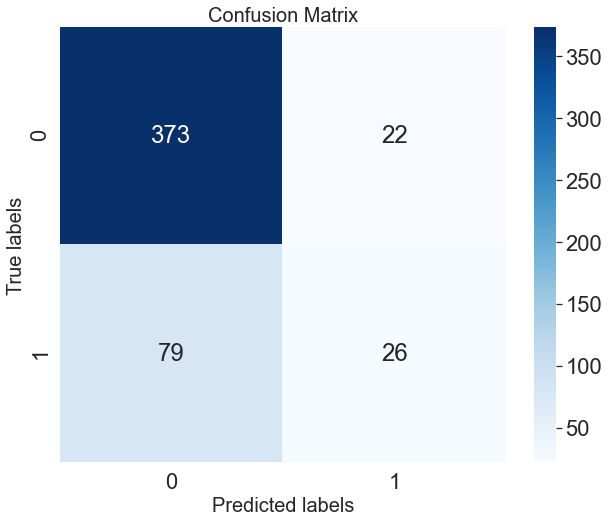

In [55]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(cm,annot=True, fmt='g', cmap="Blues", ax=ax)

#Labels, titles and ticks
ax.set_xlabel('Predicted labels', fontsize=20);
ax.set_ylabel('True labels', fontsize=20);
ax.set_title('Confusion Matrix', fontsize = 20);